In [151]:
!pip install icecream
from icecream import ic
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
data = pd.read_csv(r'KysMlecna.csv', sep = ",")  # load data set and check for separator ...
data.head()

,matka,novorozenec
0,40,33
1,64,46
2,34,23
3,15,12
4,57,56


In [154]:
PREDICTED = 'novorozenec'
PREDICTED_BY = 'matka' 
data = data.sort_values(by=PREDICTED_BY)
data.head()

,matka,novorozenec
3,15,12
2,34,23
0,40,33
5,45,40
4,57,56


ic| data:    matka  novorozenec
          3     15           12
          2     34           23
          0     40           33
          5     45           40
          4     57           56
          1     64           46
ic| X: [15, 34, 40, 45, 57, 64], Y: [12, 23, 33, 40, 56, 46]


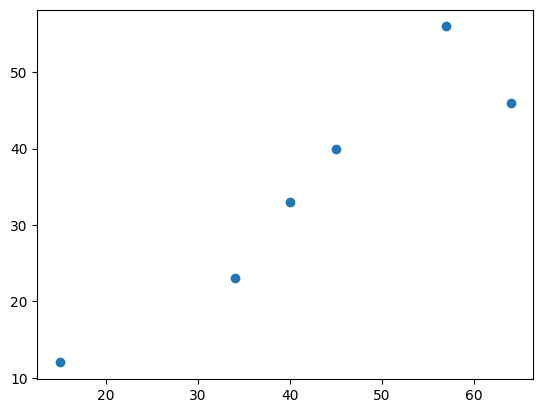

In [155]:

#data['..'] = data['..'].str.replace(',', '.').astype(float) # also fix the separator for numbers if needed 
ic(data)
X = data[PREDICTED_BY].tolist()
Y = data[PREDICTED].tolist()
ic(X, Y)
plt.scatter(X, Y)
plt.show()



Jednoduchšia verzia ak potrebujete iba jednoduchý graf a predikciu

Predikcia pre hodnotu 60 : 49.950445986124876


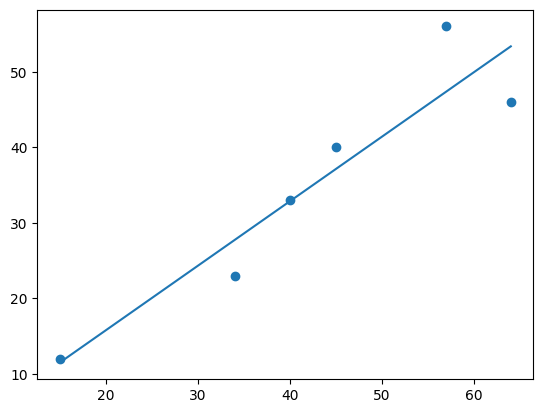

In [156]:
# parametre sú X, Y a nakoniec stupen polynómu aký chcete
coeficients = np.polyfit(X, Y, deg=1)
mymodel = np.poly1d(coeficients)
print("Predikcia pre hodnotu 60 :", mymodel(60))
# vykresli model
myline = np.linspace(min(X), max(X), 100)
plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))

In [157]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=1)
XP = polynomial_features.fit_transform(data[PREDICTED_BY].values.reshape((-1, 1)))
ic(XP)
model = sm.OLS(Y,XP).fit()
model.summary(alpha=0.05)

ic| XP: array([[ 1., 15.],
               [ 1., 34.],
               [ 1., 40.],
               [ 1., 45.],
               [ 1., 57.],
               [ 1., 64.]])
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     27.72
Date:                Mon, 24 Apr 2023   Prob (F-statistic):            0.00623
Time:                        16:01:14   Log-Likelihood:                -18.352
No. Observations:                   6   AIC:                             40.70
Df Residuals:                       4   BIC:                             40.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3082      7.361     -0.178      0.868     -21.747      19.131
x1             0.8543      0.162      5.265      0.006       0.404       1.305
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.177
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.225
Skew:                           0.190   Prob(JB):                        0.894
Kurtosis:                       2.131   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
print("R^2: ", model.rsquared)
print("Adjusted R^2: ", model.rsquared_adj)
# ostatné parametre na https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

R^2:  0.8739116934927426
Adjusted R^2:  0.8423896168659282


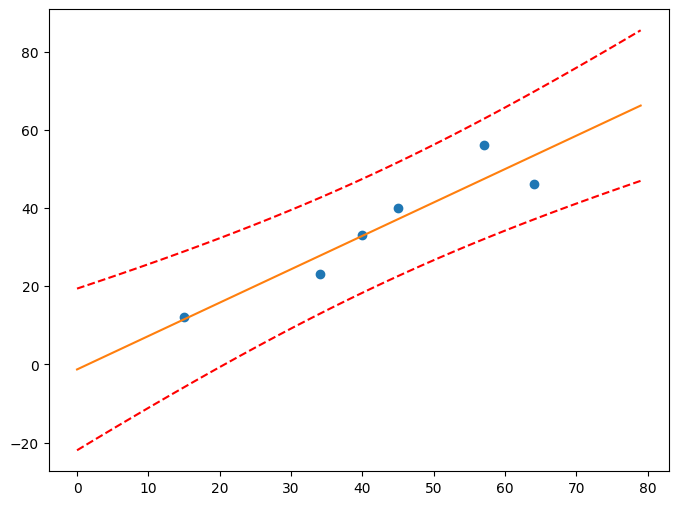

In [159]:
X_plot = np.arange(0,80,1)
X_plotP = polynomial_features.fit_transform(X_plot.reshape((-1, 1)))
pred_ols = model.get_prediction(X_plotP)
iv_l = pred_ols.  summary_frame(alpha=0.1)["obs_ci_lower"]
iv_u = pred_ols.summary_frame(alpha=0.1)["obs_ci_upper"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X_plot, pred_ols.predicted_mean, label="OLS")
ax.plot(X_plot, iv_u, "r--")
ax.plot(X_plot, iv_l, "r--")